## NLP Challenge for fellowship.ai application

Sentiment Analysis on dataset: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

#### Imports

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import collections
from fastai.text.all import *
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Gaurang
[nltk_data]     Bharti\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Exploratory Data Analysis

In [3]:
file = "IMDB Dataset.csv"
df = pd.read_csv(file)

In [4]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [6]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


[Text(0.5, 1.0, 'Count of positive and negative sentiment reviews'),
 Text(0.5, 0, 'Sentiment'),
 Text(0, 0.5, 'Count')]

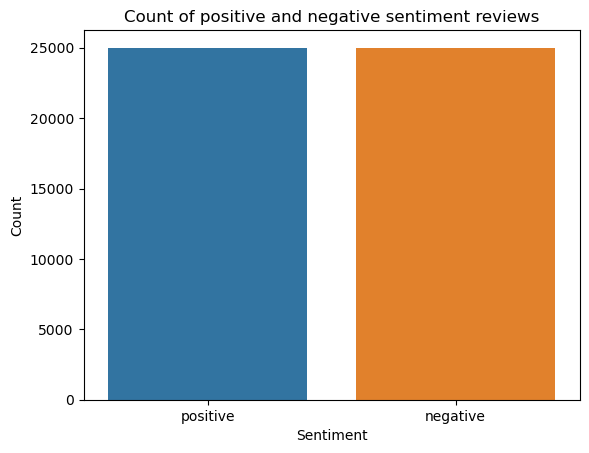

In [7]:
sns.countplot(data=df, x='sentiment').set(title="Count of positive and negative sentiment reviews", xlabel="Sentiment", ylabel="Count")

In [8]:
def plot_top_non_stopwords(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    counter=collections.Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:40]:
        if (word not in stop):
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y,y=x)

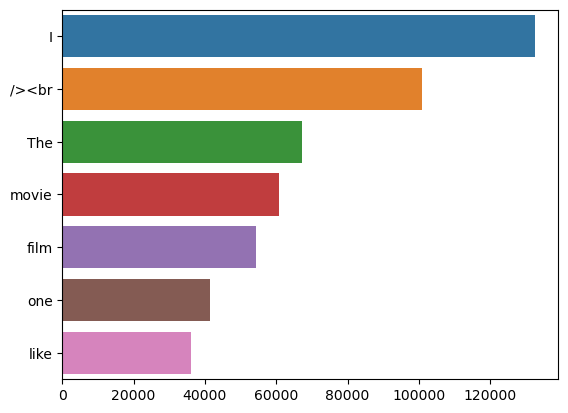

In [9]:
plot_top_non_stopwords(df['review'])

It looks like `<br /><br />` comes up a lot in the reviews. This needs to be cleaned.

In [10]:
df['review'] = df['review'].str.replace("<br /><br />", "")
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming tec...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


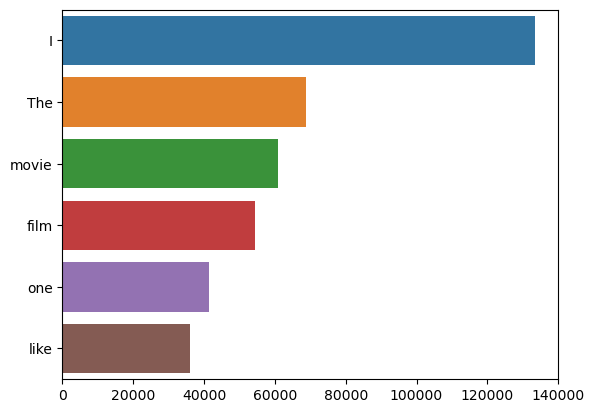

In [11]:
plot_top_non_stopwords(df['review'])

### Building the model

In [18]:
train, test = train_test_split(df, train_size=0.80)

In [19]:
imdb_dls = TextDataLoaders.from_df(train, text_col='review', label_col='sentiment')

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `n_workers` has to be changed to 0 to avoid getting stuck


In [20]:
learn = text_classifier_learner(imdb_dls, AWD_LSTM, metrics=accuracy)
learn.fine_tune(epochs=5)

epoch,train_loss,valid_loss,accuracy,time
0,0.452935,0.391373,0.822375,01:44


epoch,train_loss,valid_loss,accuracy,time


OutOfMemoryError: CUDA out of memory. Tried to allocate 132.00 MiB (GPU 0; 6.00 GiB total capacity; 5.19 GiB already allocated; 0 bytes free; 5.26 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF